# London Cycle Hire


https://data.london.gov.uk/dataset/number-bicycle-hires

Heathrow monthly weather data https://www.metoffice.gov.uk/pub/data/weather/uk/climate/stationdata/heathrowdata.txt


variables
number of bicycle hires
day of the week
time of the year
weather

In [230]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
import warnings; warnings.simplefilter('ignore')

In [2]:
daily = pd.read_csv('data/tfl-daily-cycle-hires-daily.csv', skiprows=1, names=('day','hires'))
monthly = pd.read_csv('data/tfl-daily-cycle-hires-monthly.csv', skiprows=1, names=('month','hires'))

In [3]:
#convert datetimes from strings
daily['datetime'] = pd.to_datetime(daily['day'], format='%d/%m/%Y')
daily['day-of-week'] = daily['datetime'].dt.day_name()

#reindex using datetime
daily = daily.set_index('datetime')

daily.loc['2017-01-01':'2017-12-31']

,day,hires,day-of-week
datetime,,,
2017-01-01,01/01/2017,6534,Sunday
2017-01-02,02/01/2017,11954,Monday
2017-01-03,03/01/2017,19622,Tuesday
2017-01-04,04/01/2017,22122,Wednesday
2017-01-05,05/01/2017,23580,Thursday
2017-01-06,06/01/2017,18973,Friday
2017-01-07,07/01/2017,13879,Saturday
2017-01-08,08/01/2017,13506,Sunday
2017-01-09,09/01/2017,38042,Monday


In [4]:
daily.describe()

,hires
count,3046.000000
mean,25448.303020
std,9299.199067
min,2764.000000
25%,18879.250000
50%,25222.000000
75%,32336.000000
max,73094.000000


In [5]:
monthly['datetime'] = pd.to_datetime(monthly['month'], format='%b-%y')
monthly['month-of-year'] = monthly['datetime'].dt.month_name()

#reindex using datetime
monthly = monthly.set_index('datetime')

monthly

,month,hires,month-of-year
datetime,,,
2010-07-01,Jul-10,12461,July
2010-08-01,Aug-10,341203,August
2010-09-01,Sep-10,540859,September
2010-10-01,Oct-10,544412,October
2010-11-01,Nov-10,456304,November
2010-12-01,Dec-10,285574,December
2011-01-01,Jan-11,403178,January
2011-02-01,Feb-11,398292,February
2011-03-01,Mar-11,556155,March


In [6]:
monthly.describe()

,hires
count,1.010000e+02
mean,7.674805e+05
std,2.399596e+05
min,1.246100e+04
25%,5.863250e+05
50%,7.268930e+05
75%,9.736820e+05
max,1.253102e+06


### Seasonal Variations

(array([734138., 734503., 734869., 735234., 735599., 735964., 736330.,
        736695., 737060.]), <a list of 9 Text xticklabel objects>)

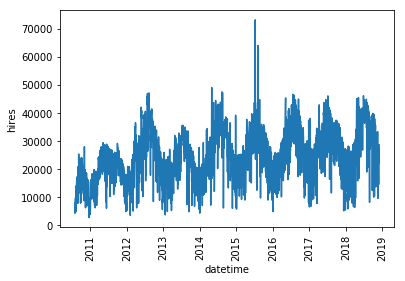

In [7]:
sns.lineplot(x=daily.index, y='hires', data=daily)
plt.xticks(rotation=90)

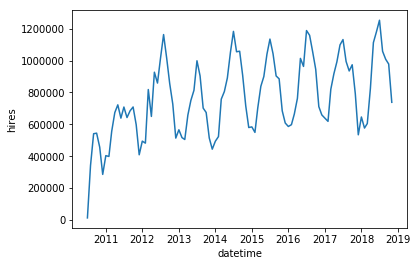

In [8]:
sns.lineplot(x=monthly.index, y='hires', data=monthly)

In [9]:
#data seems to have settled to an annual trend so lets extract most recent year

daily_2017 = daily.loc['2017-01-01':'2017-12-31']
monthly_2017 = monthly.loc['2017-01-01':'2017-12-31']
monthly_2017

,month,hires,month-of-year
datetime,,,
2017-01-01,Jan-17,638491,January
2017-02-01,Feb-17,618550,February
2017-03-01,Mar-17,819752,March
2017-04-01,Apr-17,917716,April
2017-05-01,May-17,992601,May
2017-06-01,Jun-17,1098294,June
2017-07-01,Jul-17,1131838,July
2017-08-01,Aug-17,994199,August
2017-09-01,Sep-17,934751,September


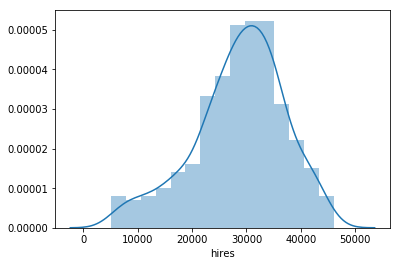

In [275]:
sns.distplot(daily_2017['hires'])

(array([736330., 736389., 736450., 736511., 736573., 736634., 736695.]),
 <a list of 7 Text xticklabel objects>)

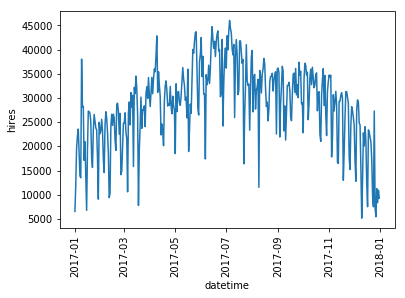

In [10]:
sns.lineplot(x=daily_2017.index, y='hires', data=daily_2017)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

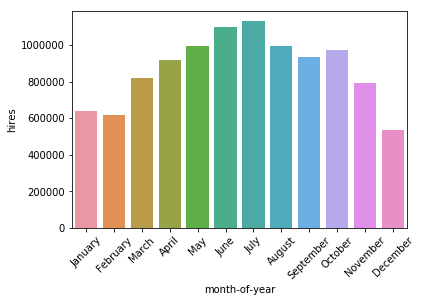

In [11]:
g = sns.barplot(x='month-of-year', y='hires', data = monthly_2017)
plt.xticks(rotation=45)

### Weekly Variations

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

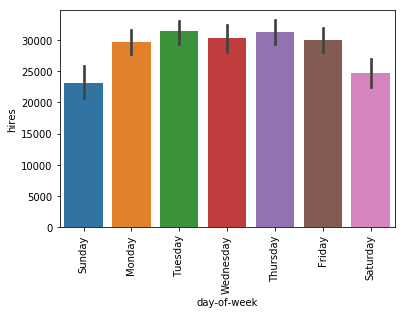

In [231]:
sns.barplot(x='day-of-week', y='hires', data = daily_2017)
plt.xticks(rotation=90)

Calculate mean and std deviation for each day of the week

In [226]:
#create dataframe of mean and std dev for each day of the week

day_stats = pd.DataFrame(columns=('day','mean','std'))

day = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
mean = []
std = []

for i in range(len(day)):
    mean.append(float(daily_2017.loc[daily_2017['day-of-week'] == day[i]].mean()))
    std.append(float(daily_2017.loc[daily_2017['day-of-week'] == day[i]].std()))

day_stats['day'] = day
day_stats['mean'] = mean
day_stats['std'] = std  
    
day_stats

,day,mean,std
0,Sunday,23160.471698,10002.309386
1,Monday,29662.769231,6949.326667
2,Tuesday,31383.326923,6890.363973
3,Wednesday,30372.500000,7762.690224
4,Thursday,31224.307692,6758.072833
5,Friday,29973.615385,7121.588483
6,Saturday,24663.076923,8866.905384


Sunday


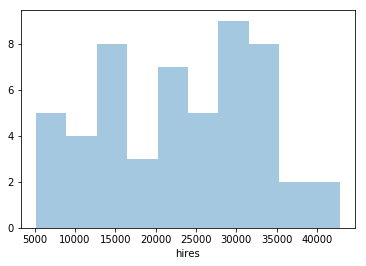

Monday


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


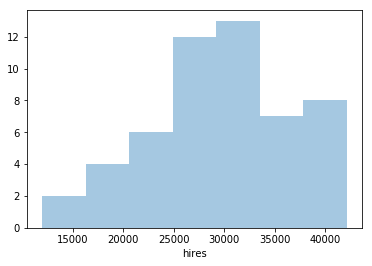

Tuesday


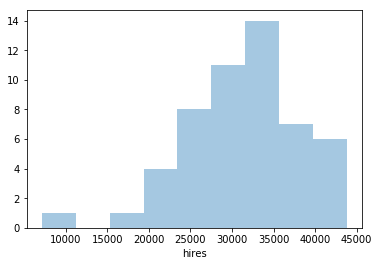

Wednesday


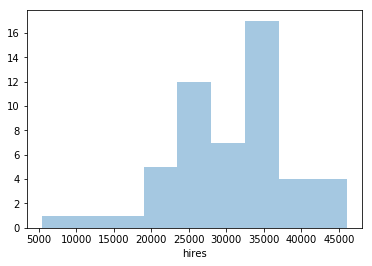

Thursday


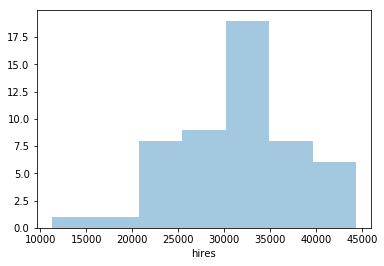

Friday


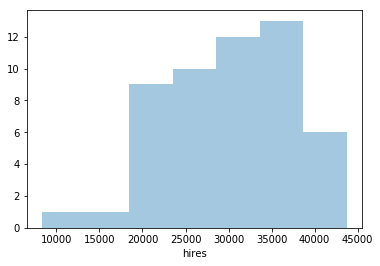

Saturday


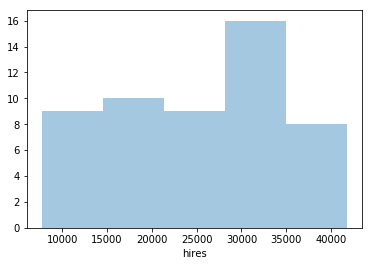

In [218]:
print('Sunday')
sns.distplot((daily_2017.loc[daily_2017['day-of-week'] == 'Sunday'])['hires'], kde=False, bins=10)
plt.show()
print('Monday')
sns.distplot((daily_2017.loc[daily_2017['day-of-week'] == 'Monday'])['hires'], kde=False)
plt.show()
print('Tuesday')
sns.distplot((daily_2017.loc[daily_2017['day-of-week'] == 'Tuesday'])['hires'], kde=False)
plt.show()
print('Wednesday')
sns.distplot((daily_2017.loc[daily_2017['day-of-week'] == 'Wednesday'])['hires'], kde=False)
plt.show()
print('Thursday')
sns.distplot((daily_2017.loc[daily_2017['day-of-week'] == 'Thursday'])['hires'], kde=False)
plt.show()
print('Friday')
sns.distplot((daily_2017.loc[daily_2017['day-of-week'] == 'Friday'])['hires'], kde=False)
plt.show()
print('Saturday')
sns.distplot((daily_2017.loc[daily_2017['day-of-week'] == 'Saturday'])['hires'], kde=False)
plt.show()


### Weather Data

In [14]:
weather = pd.read_csv('data/weather.txt', skiprows=757,delim_whitespace=True, skipfooter=10, names=('year','month','temp_max','temp_min','af','rain','sun'), engine='python',dtype={'year':str,'month':str})
#convert month into year-month datetime format
weather["datetime"] = pd.to_datetime((weather["year"].map(str) + "-" + weather["month"]))
weather = weather.set_index('datetime')
weather

,year,month,temp_max,temp_min,af,rain,sun
datetime,,,,,,,
2010-07-01,2010,7,25.0,15.1,0,18.0,161.8#
2010-08-01,2010,8,21.6,13.2,0,88.6,110.9#
2010-09-01,2010,9,19.4,11.2,0,38.2,128.7#
2010-10-01,2010,10,15.2,8.3,1,74.8,104.0#
2010-11-01,2010,11,9.1,4.0,7,32.2,50.0#
2010-12-01,2010,12,3.9,-1.5,21,21.4,18.5#
2011-01-01,2011,1,7.4,2.8,8,76.8,35.6#
2011-02-01,2011,2,10.2,4.8,1,42.8,36.2#
2011-03-01,2011,3,12.3,3.8,4,14.6,126.4#


In [15]:
#merge wether data into monthly hire dataframe
monthly = pd.merge(left=monthly,right=weather,left_index=True,right_index=True)
monthly_2017 = monthly.loc['2017-01-01':'2017-12-31']

In [173]:
monthly_2017

,month_x,hires,month-of-year,year,month_y,temp_max,temp_min,af,rain,sun
datetime,,,,,,,,,,
2017-01-01,Jan-17,638491,January,2017,1,7.6,0.7,15,60.2,64.5#
2017-02-01,Feb-17,618550,February,2017,2,10.0,4.4,1,38.2,47.8#
2017-03-01,Mar-17,819752,March,2017,3,14.1,6.6,0,25.8,116.3#
2017-04-01,Apr-17,917716,April,2017,4,15.8,5.9,0,4.6,186.2#
2017-05-01,May-17,992601,May,2017,5,19.8,10.4,0,64.8,164.8#
2017-06-01,Jun-17,1098294,June,2017,6,24.0,13.9,0,46.4,204.3#
2017-07-01,Jul-17,1131838,July,2017,7,23.8,14.9,0,90.0,178.0#
2017-08-01,Aug-17,994199,August,2017,8,22.0,13.5,0,58.6,174.9#
2017-09-01,Sep-17,934751,September,2017,9,19.2,11.0,0,59.0,120.1#


Look at all variables in a facet grid

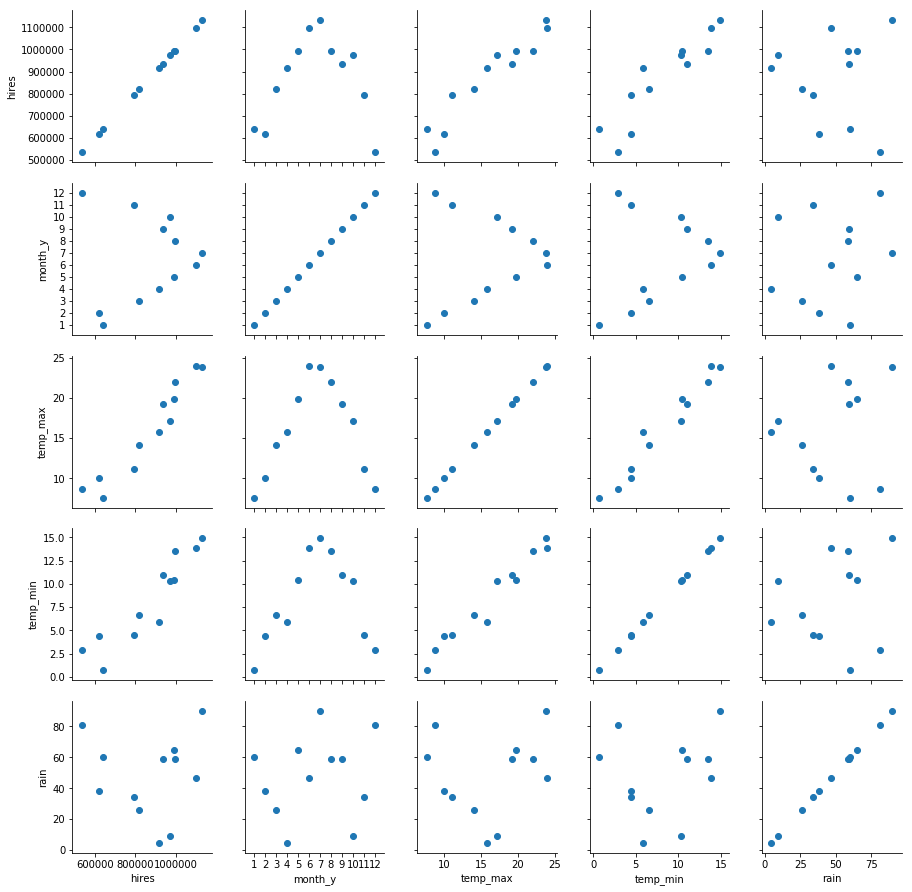

In [18]:
g = sns.PairGrid(monthly_2017.iloc[:,[1,4,5,6,8]])
g.map(plt.scatter);

closer look at temp versus month, plotting times eries we see a very similar relationship temp - month, the correlat

In [169]:
#https://www.datacamp.com/community/tutorials/time-series-analysis-tutorial

monthly_2017.corr()

,hires,temp_max,temp_min,af,rain
hires,1.000000,0.954595,0.917117,-0.650033,-0.012387
temp_max,0.954595,1.000000,0.979856,-0.670635,0.157650
temp_min,0.917117,0.979856,1.000000,-0.690314,0.198254
af,-0.650033,-0.670635,-0.690314,1.000000,0.291948
rain,-0.012387,0.157650,0.198254,0.291948,1.000000


hires


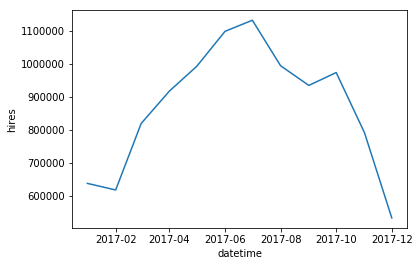

temp_max


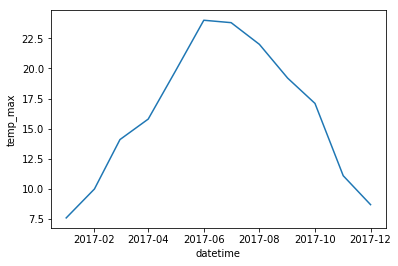

temp_min


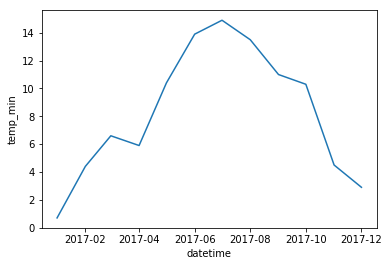

In [229]:
sns.lineplot(x=monthly_2017.index, y='hires', data=monthly_2017)
print('hires')
plt.show()
sns.lineplot(x=monthly_2017.index, y='temp_max', data=monthly_2017)
print('temp_max')
plt.show()
sns.lineplot(x=monthly_2017.index, y='temp_min', data=monthly_2017)
print('temp_min')
plt.show()

In [367]:
monthly_2017

,datetime,month_x,hires,month-of-year,year,month_y,temp_max,temp_min,af,rain,sun,ave_hires_day
0,2017-01-01,Jan-17,638491,January,2017,1,7.6,0.7,15,60.2,64.5#,20975.394218
1,2017-02-01,Feb-17,618550,February,2017,2,10.0,4.4,1,38.2,47.8#,20320.302234
2,2017-03-01,Mar-17,819752,March,2017,3,14.1,6.6,0,25.8,116.3#,26930.091984
3,2017-04-01,Apr-17,917716,April,2017,4,15.8,5.9,0,4.6,186.2#,30148.357424
4,2017-05-01,May-17,992601,May,2017,5,19.8,10.4,0,64.8,164.8#,32608.442838
5,2017-06-01,Jun-17,1098294,June,2017,6,24.0,13.9,0,46.4,204.3#,36080.617608
6,2017-07-01,Jul-17,1131838,July,2017,7,23.8,14.9,0,90.0,178.0#,37182.588699
7,2017-08-01,Aug-17,994199,August,2017,8,22.0,13.5,0,58.6,174.9#,32660.939553
8,2017-09-01,Sep-17,934751,September,2017,9,19.2,11.0,0,59.0,120.1#,30707.982917
9,2017-10-01,Oct-17,973682,October,2017,10,17.1,10.3,0,9.2,84.6#,31986.925099


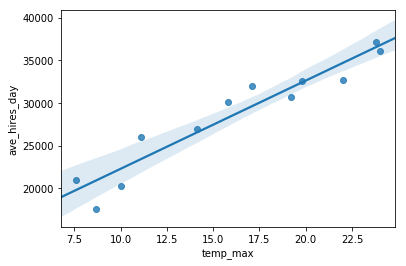

In [368]:
sns.regplot(x="temp_max", y="ave_hires_day", data=monthly_2017)

In [364]:
#https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.linregress.html
import scipy.stats

#create new field ave_hires_day uisng an average of 30.44 days in a month
monthly_2017['ave_hires_day'] = ((monthly_2017['hires'])/30.44)

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x = monthly_2017['temp_max'], y = monthly_2017['ave_hires_day'])

#calculate mean temperature in year
mean_temp_max = monthly_2017['temp_max'].mean()

print(intercept)
print(slope)
print(mean_temp)

11952.417214519679
1033.8474356573317
16.099999999999998


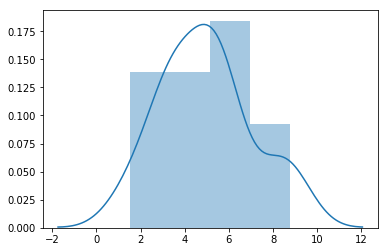

In [384]:
sns.distplot(np.random.triangular(1,6,12,12))

## Analysis

- linear relationship temp to hires
- poisson distribution for hires to month (also temp to month)
- granularity of rain data is not enough to identify any trends
- days of week - consistent m-f s,s lower








Day of week, create data for random days based on meand and standard deviation

Seasonal Poisson distribution

Temp - linear regression model, though the seasonality seems to folow same trend (plot temp to hires)



Generate 100 random dates in 2018 using numpy

based on day of week randomise mean and std dev



create model - day = mean day of week

month 




In [19]:
#observe number of hires for each day of week

daily_2017.loc[daily_2017['day-of-week'] == 'Monday']

,day,hires,day-of-week
datetime,,,
2017-01-02,02/01/2017,11954,Monday
2017-01-09,09/01/2017,38042,Monday
2017-01-16,16/01/2017,19230,Monday
2017-01-23,23/01/2017,23280,Monday
2017-01-30,30/01/2017,24969,Monday
2017-02-06,06/02/2017,24312,Monday
2017-02-13,13/02/2017,24159,Monday
2017-02-20,20/02/2017,28665,Monday
2017-02-27,27/02/2017,20001,Monday


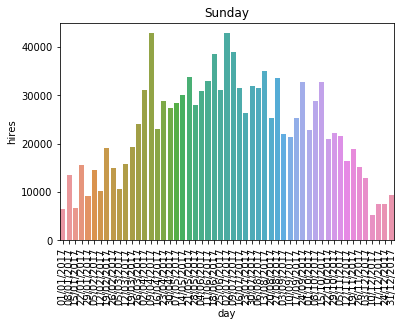

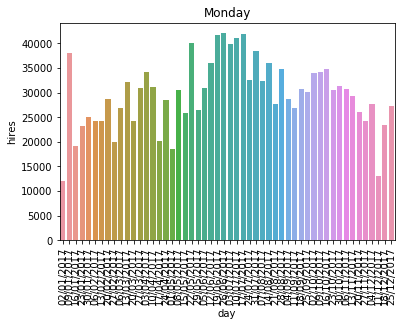

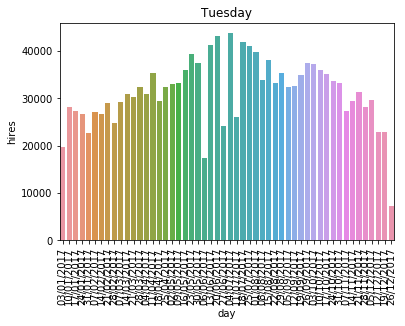

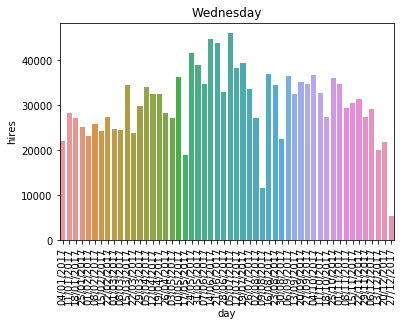

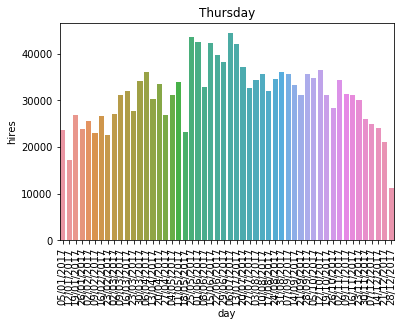

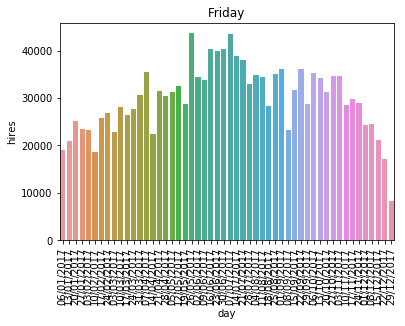

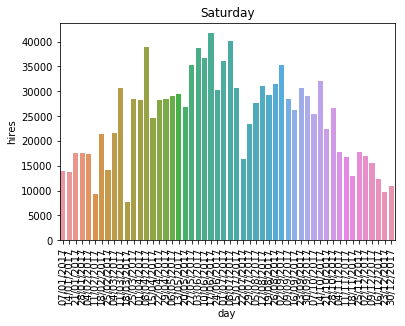

In [20]:
sns.barplot(x='day', y='hires', data =(daily_2017.loc[daily_2017['day-of-week'] == 'Sunday']))
plt.xticks(rotation=90)
plt.title('Sunday')
plt.show()

sns.barplot(x='day', y='hires', data =(daily_2017.loc[daily_2017['day-of-week'] == 'Monday']))
plt.xticks(rotation=90)
plt.title('Monday')
plt.show()

sns.barplot(x='day', y='hires', data =(daily_2017.loc[daily_2017['day-of-week'] == 'Tuesday']))
plt.xticks(rotation=90)
plt.title('Tuesday')
plt.show()

sns.barplot(x='day', y='hires', data =(daily_2017.loc[daily_2017['day-of-week'] == 'Wednesday']))
plt.xticks(rotation=90)
plt.title('Wednesday')
plt.show()

sns.barplot(x='day', y='hires', data =(daily_2017.loc[daily_2017['day-of-week'] == 'Thursday']))
plt.xticks(rotation=90)
plt.title('Thursday')
plt.show()

sns.barplot(x='day', y='hires', data =(daily_2017.loc[daily_2017['day-of-week'] == 'Friday']))
plt.xticks(rotation=90)
plt.title('Friday')
plt.show()

sns.barplot(x='day', y='hires', data =(daily_2017.loc[daily_2017['day-of-week'] == 'Saturday']))
plt.xticks(rotation=90)
plt.title('Saturday')
plt.show()

Looking at a time series based on days of week there appears to be seasonality but there are a lot of anomalies and variation in the data.

## Generate Data set

### Random set of dates in a year

Created random integer between 1 and 365

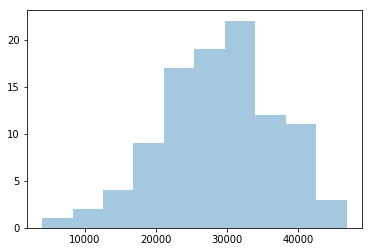

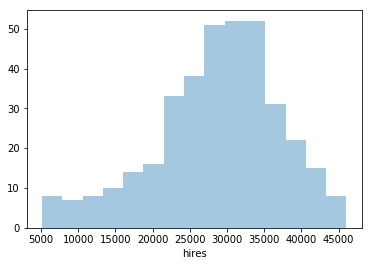

In [424]:
#from https://ubuntuforums.org/archive/index.php/t-2032246.html
#https://stackoverflow.com/questions/9847213/how-do-i-get-the-day-of-week-given-a-date-in-python
#https://treyhunner.com/2016/04/how-to-loop-with-indexes-in-python/

import datetime

np.random.seed(19810826)

#generate random integers between 1 and 365 to represent days in 2018
x  = np.random.randint(1,365,100)

#convert numbers 1-365 as date in 2018
date_sam = [] 
sample_1 = []


for i in x: 
    date_sam.append(datetime.date(2018,1,1) + datetime.timedelta(int(i)))
       
# iterate through y to produce month as integer and assign a random number based on normal distribution and mean
# and standard deviation for the day of the week

for i in range(len(date_sam)):
    a = int(date_sam[i].strftime('%w'))
    sample_1.append(float(np.asarray(np.random.normal((day_stats.loc[[a] ,'mean']),(day_stats.loc[[a] ,'std'])))))
    i+1
    
    
    
    
#show plot and compare to distribution of 2017 hires
sns.distplot(sample_1, kde=False)
plt.show()
sns.distplot(daily_2017['hires'],kde=False)
plt.show()

lets look at the linera relationship between temp_max and hires

saw there was a good fit


In [429]:
#reset index so months align with dat_sam
monthly_2017 = monthly_2017.reset_index()

ValueError: cannot insert level_0, already exists

In [427]:
#iterate through y to produce month as integer
sample_2 = []
i=0
for i in range(len(date_sam)):
    
    t = (int(date_sam[i].strftime('%m'))-1)
    u = ((float(monthly_2017.loc[[t] ,'temp_max']*slope)+intercept))
    v = (mean_temp_max*slope)+intercept
    sample_2.append((sample_1[i]+(u-v)))
    i+1

#the dates were pulled randomly so we can check how they compare to 2018 data
#show plot and compare to distribution of 2017 hires
  
daily.loc['2017-01-01':'2017-12-31']
results_df = pd.DataFrame(columns=('date','sam_1_hires','sam_2_hires'))

results_df['date'] = date_sam
results_df['sam_1_hires'] = sample_1
results_df['sam_2_hires'] = sample_2

results_df = results_df.set_index('date')

results_df = pd.merge(left=results_df,right=daily,left_index=True,right_index=True)
results_df
                      

,sam_1_hires,sam_2_hires,day,hires,day-of-week
2018-01-05,36621.679942,27833.976739,05/01/2018,21759,Friday
2018-01-09,31349.637830,22561.934627,09/01/2018,24683,Tuesday
2018-01-11,31626.974216,22839.271013,11/01/2018,25222,Thursday
2018-01-15,25797.734575,17010.031372,15/01/2018,19161,Monday
2018-01-16,30950.450121,22162.746918,16/01/2018,26921,Tuesday
2018-01-27,38445.292281,29657.589078,27/01/2018,14472,Saturday
2018-01-28,20797.114309,12009.411106,28/01/2018,17512,Sunday
2018-01-29,34694.538774,25906.835571,29/01/2018,26371,Monday
2018-01-30,40909.652790,32121.949587,30/01/2018,28002,Tuesday
2018-02-02,36038.978699,29732.509342,02/02/2018,25331,Friday


In [431]:
results_df.corr()

,sam_1_hires,sam_2_hires,hires
sam_1_hires,1.000000,0.787554,0.093503
sam_2_hires,0.787554,1.000000,0.501433
hires,0.093503,0.501433,1.000000


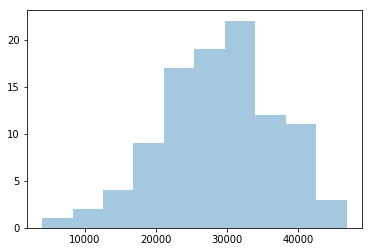

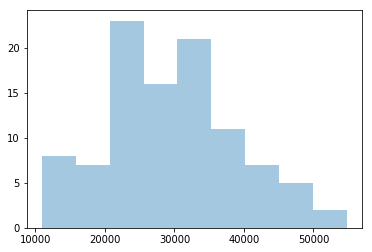

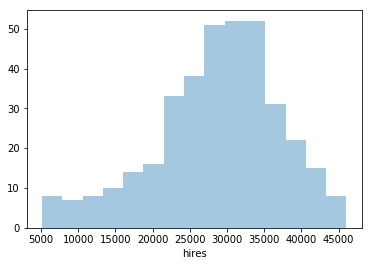

In [430]:
#show plot and compare to distribution of 2017 hires
sns.distplot(sample_1, kde=False)
plt.show()
sns.distplot(sample_2, kde=False)
plt.show()
sns.distplot(daily_2017['hires'],kde=False)
plt.show()